# Deep Learning algorithm & model

# <font color='red'> A. 활성화 함수 - 비선형 함수(Nonlinear function)

In [1]:
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. 계단 함수(Step function)


Text(0.5, 1.0, 'Step Function')

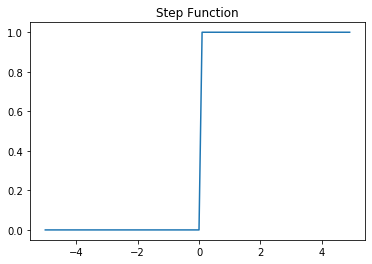

In [2]:
def step(x):
    return np.array(x > 0, dtype=np.int)
    
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

In [3]:
np.array(np.arange(-5.0, 5.0, 0.1) > 0, dtype= np.int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
np.array(np.arange(-5.0, 5.0, 0.1) > 0)*1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## 2. 시그모이드 함수(Sigmoid function)와 기울기 소실

시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해져 그 값은 0에 가까워지는데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 되는 현상을 기울기 소실(Vanishing Gradient) 문제

Text(0.5, 1.0, 'Sigmoid Function')

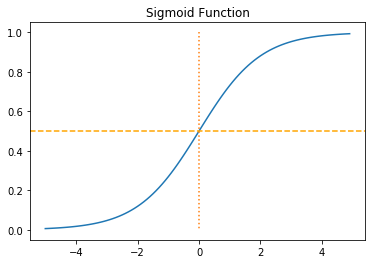

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.axhline(y=0.5, color='orange', linestyle='--')
plt.title('Sigmoid Function')
plt.show()

## 3. 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이때문에 시그모이드 함수와 비교하면 반환값의 변화폭이 더 커서 시그모이드 함수보다는 기울기 소실 증상이 적은 편이라 은닉층에서 시그모이드 함수보다는 많이 사용

Text(0.5, 1.0, 'Tanh Function')

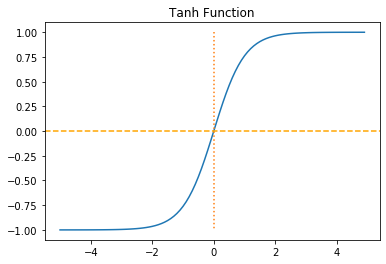

In [6]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

## 4. 렐루 함수(ReLU)

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환하게 되어 렐루 함수는 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동
렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠르나 여전히 문제점이 존재하는데, 입력값이 음수면 기울기도 0이 되어 이 뉴런은 다시 회생하는 것이 매우 어렵워 이 문제를 죽은 렐루(dying ReLU)라 함

Text(0.5, 1.0, 'Relu Function')

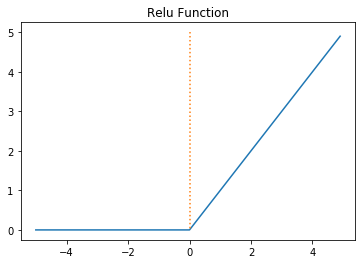

In [7]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

## 5. 리키 렐루(Leaky ReLU)
죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했습니다. 변형 함수는 여러 개가 있지만 Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환

Text(0.5, 1.0, 'Leaky ReLU Function')

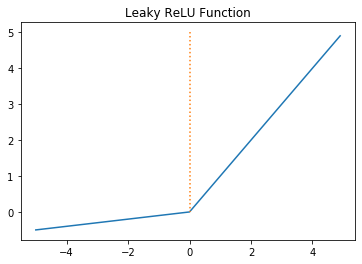

In [8]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

## 6. 소프트맥스 함수(Softamx function)
은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만 분류 문제를 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용합니다.

소프트맥스 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용되는데, 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용

Text(0.5, 1.0, 'Softmax Function')

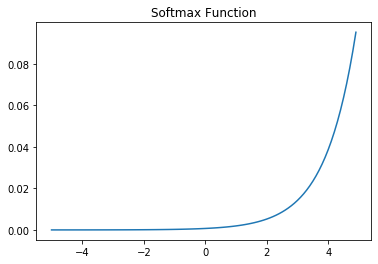

In [9]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

# <font color='red'> B. Logistic regression and Neural network
### 데이터 생성

In [10]:
x_train= np.random.random((1000,1))
np.mean(x_train), np.std(x_train)
y_train = x_train*2 + np.random.random((1000,1))/3.0
np.mean(y_train), np.std(y_train)

x_test= np.random.random((100,1))
y_test = x_test*2 + np.random.random((100,1))/3.0

(0.5124399902122166, 0.2946849651183929)

(1.1889925167216904, 0.5999345520365742)

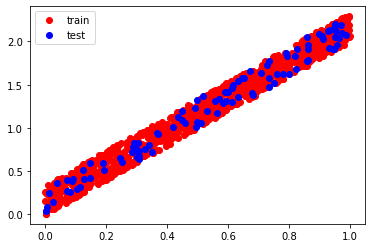

In [11]:
plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 1. Scikit-learn API의 linear regression

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# 모델구성하기
model = linear_model.LinearRegression()

# 학습하고 예측
y_pred = model.fit(x_train, y_train).predict(x_test)

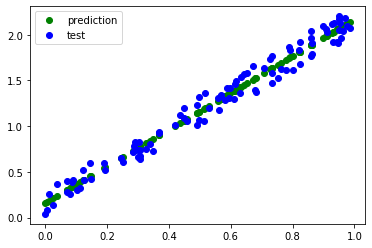

절편: [0.159568], 기울기:[[2.00886844]], mse: 0.008744938428263866


In [13]:
plt.plot(x_test, y_pred, 'go')
plt.plot(x_test, y_test, 'bo')
plt.legend(['prediction', 'test'], loc='upper left')
plt.show()

# 파라미터 추정과 평가
print(f'절편: {model.intercept_}, 기울기:{model.coef_}, mse: {mean_squared_error(y_test, y_pred)}')

# 2. 퍼셉트론 신경망

In [14]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [15]:
x_train.shape

(1000, 1)

입력변수가 1d tensor

In [16]:
# 모델구성
model = Sequential()
model.add(Dense(1, input_dim=1))

# Parameters (weight, bias)
- The # of weights : {입력행렬 차원(1차원) x layer1 뉴런수(1 nodes)} = 1
- The # of bias : layer1 뉴런 수(1 nodes) = 1
- 추정할 파라미터 개수는 1+1 = 2

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 학습하기
model.compile(optimizer='rmsprop', loss='mse')
hist = model.fit(x_train, y_train, epochs=50, batch_size=64) # epoch을 증가시켜보기

Epoch 1/50
1000/1000 [==============================] - 0s 172us/step - loss: 0.2223
Epoch 2/50
1000/1000 [==============================] - 0s 8us/step - loss: 0.1973
Epoch 3/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.1772
Epoch 4/50
1000/1000 [==============================] - 0s 8us/step - loss: 0.1586
Epoch 5/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.1412
Epoch 6/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.1249
Epoch 7/50
1000/1000 [==============================] - 0s 9us/step - loss: 0.1098
Epoch 8/50
1000/1000 [==============================] - 0s 8us/step - loss: 0.0960
Epoch 9/50
1000/1000 [==============================] - 0s 8us/step - loss: 0.0833
Epoch 10/50
1000/1000 [==============================] - 0s 7us/step - loss: 0.0718
Epoch 11/50
1000/1000 [==============================] - 0s 8us/step - loss: 0.0614
Epoch 12/50
1000/1000 [==============================] - 0s 8us/step - loss: 0.0520

절편: [0.16714188], 기울기:[[1.9950792]]


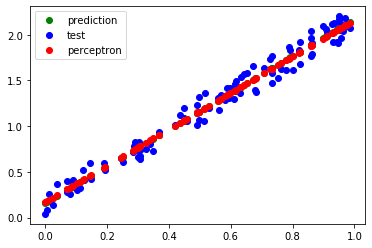

In [19]:
w, b = model.get_weights()
print(f'절편: {b}, 기울기:{w}')

plt.plot(x_test, y_pred, 'go')
plt.plot(x_test, y_test, 'bo')
plt.plot(x_test, b + w*x_test, 'ro')
plt.legend(['prediction', 'test', 'perceptron'], loc='upper left')
plt.show()

### <font color ='red'> epoch을 200으로 증가시키면 예측을 잘한다. 200 epoch을 훈련후 다시 그려보기

dict_keys(['loss'])

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'MSE')

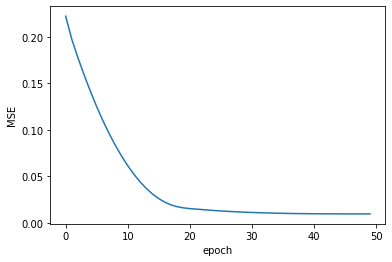

In [20]:
# 학습과정 확인하기
hist.history.keys()
plt.plot(hist.history['loss'])
plt.xlabel('epoch'); plt.ylabel('MSE')

In [21]:
# 모델 평가
loss = model.evaluate(x_test, y_test, batch_size=30)
print(f'mse: {loss}')

100/100 [==============================] - 0s 209us/step
mse: 0.008776204334571958


# 3. FNNM(Forward Neural Network Model) with one hidden layer
## Shallow learning model
https://keras.io/api/models/

### <font color = 'purple'> Regression
### <font color = 'purple'>  회귀예측이기 때문에 최종 layer에는 1개로 activation 함수없이 구현

In [22]:
# 모델구성
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', name="layer1"))  # Try Hidden layer의 노드(뉴런) 개수 증감
model.add(Dense(1, name="layer2"))

### Parameters (weight, bias)
- The # of weights : {입력행렬 차원(1차원) x layer1 뉴런수(10 nodes)} + {layer1 (노두수(10 nodes) x layer2 노드수(1 node))} = (1x10) + (10) = 20
- The # of bias : layer1 뉴런 수(10 nodes) + layer2 뉴런수(1 nodes) = 10+1 = 11
- 추정할 파라미터 개수는 20+11 = 31

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 10)                20        
_________________________________________________________________
layer2 (Dense)               (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 학습하기
model.compile(optimizer='rmsprop', loss='mse')
hist = model.fit(x_train, y_train, epochs=50, batch_size=64, verbose= 0) # epoch을 증가시켜보기

In [25]:
# 노드(뉴런) 개수만큼 weight(b, w)가 생성
model.get_weights()

[array([[-0.3458696 , -0.2903016 , -0.02497464,  0.81785154, -0.02911949,
         -0.45759052,  0.32359734, -0.13862145, -0.14002585,  0.10756227]],
       dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.29175144,  0.        ,
         0.        , -0.32338694,  0.        ,  0.        , -0.10747426],
       dtype=float32),
 array([[-0.3502046 ],
        [-0.12552732],
        [-0.62019086],
        [ 1.3029352 ],
        [ 0.52660626],
        [-0.6701918 ],
        [-0.16973469],
        [-0.48846647],
        [-0.36572567],
        [-0.22068912]], dtype=float32),
 array([0.28716943], dtype=float32)]

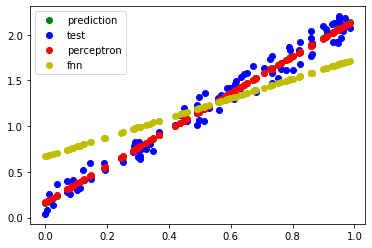

In [26]:
plt.plot(x_test, y_pred, 'go')
plt.plot(x_test, y_test, 'bo')
plt.plot(x_test, b + w*x_test, 'ro')
plt.plot(x_test, model.predict(x_test), 'yo')
plt.legend(['prediction', 'test', 'perceptron', 'fnn'], loc='upper left')
plt.show()

In [27]:
# 모델 평가
loss = model.evaluate(x_test, y_test, batch_size=30)
print(f'mse: {loss}')

100/100 [==============================] - 0s 183us/step
mse: 0.08822684288024903


dict_keys(['loss'])

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'MSE')

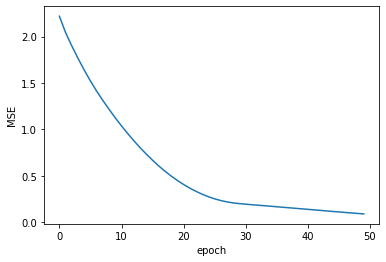

In [28]:
# 학습과정 확인하기
hist.history.keys()
plt.plot(hist.history['loss'])
plt.xlabel('epoch'); plt.ylabel('MSE')

# 4. FNNM(Forward Neural Network Model) with two hidden layer
## Deep learning model
Hidden layer를 추가할 수록 예측 성능은 높아지게 됨 

In [29]:
# 모델구성
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', name="layer1"))
model.add(Dense(10, activation='relu', name="layer2"))  
model.add(Dense(1, name="layer3"))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 10)                20        
_________________________________________________________________
layer2 (Dense)               (None, 10)                110       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 학습하기
model.compile(optimizer='rmsprop', loss='mse')
hist = model.fit(x_train, y_train, epochs=50, batch_size=64, verbose= 0)

In [32]:
# 모델 평가
loss = model.evaluate(x_test, y_test, batch_size=30)
print(f'mse: {loss}')

100/100 [==============================] - 0s 200us/step
mse: 0.008775849035009742


dict_keys(['loss'])

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'MSE')

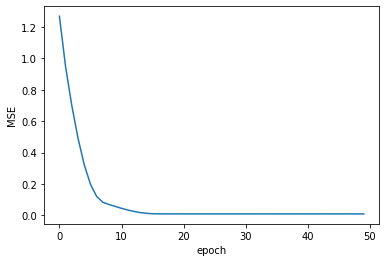

In [33]:
# 학습과정 확인하기
hist.history.keys()
plt.plot(hist.history['loss'])
plt.xlabel('epoch'); plt.ylabel('MSE')

# <font color='red'> C. Binary Classification : 실습 diabetes dataset

### 1.Loading the diabets dataset in Keras

In [36]:
import pandas as pd
dataset = pd.read_csv('../data/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 2. 데이터셋 생성하기

In [37]:
x_train = dataset.iloc[:700,0:8]
y_train = dataset.iloc[:700,8]
x_test = dataset.iloc[700:,0:8]
y_test = dataset.iloc[700:,8]

### 3. 모델 구성하기
### <font color = 'purple'> Multicalss Classification 
### <font color = 'purple'> 입력변수 8개를 받아 2개 hidden을 만들고 마지막 레이어는 sigmoid 활성화함수로 모델 구현

In [38]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 4. 모델 학습과정 설정하기

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5. 모델 학습시키기

In [40]:
model.fit(x_train, y_train, epochs=150, batch_size=64)

Epoch 1/150
700/700 [==============================] - 0s 366us/step - loss: 17.0953 - accuracy: 0.6371
Epoch 2/150
700/700 [==============================] - 0s 13us/step - loss: 11.5002 - accuracy: 0.5900
Epoch 3/150
700/700 [==============================] - 0s 11us/step - loss: 7.4335 - accuracy: 0.5286
Epoch 4/150
700/700 [==============================] - 0s 11us/step - loss: 3.1829 - accuracy: 0.4900
Epoch 5/150
700/700 [==============================] - 0s 13us/step - loss: 2.3284 - accuracy: 0.4700
Epoch 6/150
700/700 [==============================] - 0s 11us/step - loss: 2.0382 - accuracy: 0.5629
Epoch 7/150
700/700 [==============================] - 0s 13us/step - loss: 1.8745 - accuracy: 0.5157
Epoch 8/150
700/700 [==============================] - 0s 11us/step - loss: 1.6309 - accuracy: 0.5414
Epoch 9/150
700/700 [==============================] - 0s 11us/step - loss: 1.4772 - accuracy: 0.5343
Epoch 10/150
700/700 [==============================] - 0s 11us/step - loss: 1.

700/700 [==============================] - 0s 11us/step - loss: 0.5781 - accuracy: 0.6957
Epoch 81/150
700/700 [==============================] - 0s 11us/step - loss: 0.5761 - accuracy: 0.6986
Epoch 82/150
700/700 [==============================] - 0s 11us/step - loss: 0.5745 - accuracy: 0.6957
Epoch 83/150
700/700 [==============================] - 0s 11us/step - loss: 0.5733 - accuracy: 0.7000
Epoch 84/150
700/700 [==============================] - 0s 11us/step - loss: 0.5707 - accuracy: 0.6986
Epoch 85/150
700/700 [==============================] - 0s 11us/step - loss: 0.5767 - accuracy: 0.6786
Epoch 86/150
700/700 [==============================] - 0s 13us/step - loss: 0.5784 - accuracy: 0.6943
Epoch 87/150
700/700 [==============================] - 0s 11us/step - loss: 0.5734 - accuracy: 0.7000
Epoch 88/150
700/700 [==============================] - 0s 11us/step - loss: 0.5697 - accuracy: 0.6971
Epoch 89/150
700/700 [==============================] - 0s 13us/step - loss: 0.5723 - 

## Use Case
### SHAP provides multiple explainers for different kind of models.
- TreeExplainer: Support XGBoost, LightGBM, CatBoost and scikit-learn models by Tree SHAP.
- DeepExplainer (DEEP SHAP): Support TensorFlow and Keras models by using DeepLIFT and Shapley values.
- GradientExplainer: Support TensorFlow and Keras models.
- KernelExplainer (Kernel SHAP): Applying to any models by using LIME and Shapley values.

In [41]:
import shap

In [42]:
explainer = shap.GradientExplainer(model, x_train.values)
shap_values = explainer.shap_values(x_test.values)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


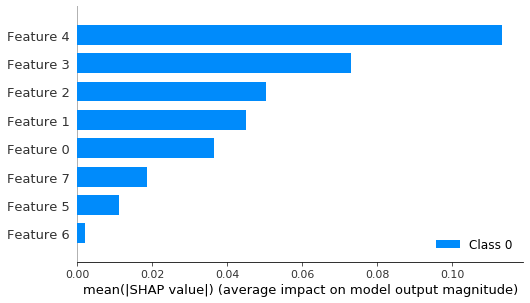

In [43]:
shap_values = explainer.shap_values(x_test.values)
shap.summary_plot(shap_values, x_test.values)

In [44]:
shap_values.

[array([[-3.36114727e-02, -1.74470805e-02, -3.98342349e-02,
          4.40639146e-02,  5.50300740e-02, -7.42122158e-03,
         -9.53931711e-04, -2.79246159e-02],
        [ 2.08838228e-02,  6.84852106e-03, -2.24315077e-02,
          1.94048230e-02, -9.22564417e-03,  1.30465813e-02,
         -6.12828007e-05, -6.20601419e-03],
        [-1.61800049e-02,  1.40275480e-03, -8.19057692e-03,
          2.54663844e-02,  8.17368254e-02,  4.86789417e-04,
          1.45227078e-03,  1.22710792e-02],
        [-6.47862302e-03, -4.20408463e-03,  1.09618224e-01,
         -8.52450207e-02,  1.67937830e-01, -1.93245860e-03,
         -1.59298512e-03, -9.90029797e-03],
        [ 2.33881804e-03, -3.07049043e-02, -2.20945925e-02,
         -9.00808442e-03, -1.82580486e-01,  8.60463176e-03,
         -4.78378171e-03, -1.93714090e-02],
        [ 1.27119683e-02, -5.71215339e-02, -2.81485822e-02,
          4.70115580e-02, -1.49514023e-02,  1.75031915e-03,
         -1.72426039e-03,  6.14571851e-04],
        [ 6.2647

# <font color='red'> D. Multiclass Classification : 실습 The MNIST dataset in Keras

### 1.Loading the MNIST dataset in Keras

In [39]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [40]:
train_images.shape
len(train_labels)
test_images.shape
len(test_labels)
test_labels

(60000, 28, 28)

60000

(10000, 28, 28)

10000

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 2. The network architecture

### <font color = 'purple'> Multicalss Classification 
### <font color = 'purple'> 10개를 구분하여야 하기 때문에 최종 layer에는 10개로 Softmax로 모델 구현

In [41]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

### 3. The compilation step
### <font color = 'purple'> 다중분류이기 떄문에 'categorical_crossentropy'


In [42]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', metrics=['accuracy'])

4. Preparing the image data (자료표준화)

In [43]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

5. model fitting

In [44]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2574 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1028 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0672 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0490 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0367 - accuracy: 0.9892


In [45]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0687 - accuracy: 0.9802


In [46]:
print('test_acc:', test_acc)

test_acc: 0.9801999926567078


# End